# Data Description 

•	START_DATE*: Start date of the ride 

•	END_DATE*: End date of the ride 

•	CATEGORY*: Ride Category 

1.	Business 

2.	Personal 
•	START*: Start location of the ride 

•	STOP*: End location of the ride 

•	MILES*: Travelling distance 

•	PURPOSE*: Ride purpose 

1.	Meal/Entertain 
2.	Temporary Site 
3.	Customer Visit 
4.	Airport/Travel 
5.	Between Offices 
6.	Charity ($) 
7.	Commute 
8.	Errand/Supplies 
9.	Meeting 
10.	Moving

# Expected Outcome 

Following operations on the data frame are expected: 

•	Data Preparation 

•	Missing Value Treatment 

•	Visualization 


## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
%matplotlib inline

## Importing Dataset

In [12]:
df = pd.read_csv("Cab_Rides.csv")
df.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,date,start time,end time,speed,ride duration,day
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,morning,NaN,NaN,NaN,NaN,NaN,Monday
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,day,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,evening,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration

In [13]:
##1. Checking Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   START_DATE*    1155 non-null   object 
 1   END_DATE*      1155 non-null   object 
 2   CATEGORY*      1155 non-null   object 
 3   START*         1155 non-null   object 
 4   STOP*          1155 non-null   object 
 5   MILES*         1155 non-null   float64
 6   PURPOSE*       653 non-null    object 
 7   month          4 non-null      object 
 8   date           0 non-null      float64
 9   start time     0 non-null      float64
 10  end time       0 non-null      float64
 11  speed          0 non-null      float64
 12  ride duration  0 non-null      float64
 13  day            2 non-null      object 
dtypes: float64(6), object(8)
memory usage: 126.5+ KB


In [14]:
##2.Checking for null values

df.isnull().sum()

## purpose has 502 missing values
## almost 45% data- will have to be filled
## cannot be dropped

START_DATE*         0
END_DATE*           0
CATEGORY*           0
START*              0
STOP*               0
MILES*              0
PURPOSE*          502
month            1151
date             1155
start time       1155
end time         1155
speed            1155
ride duration    1155
day              1153
dtype: int64

In [15]:
##3. Checking for duplicate values

df.duplicated().sum()

1

In [16]:
##4. Dropping Duplicate Value
df.drop_duplicates(inplace = True)

In [17]:
##6. Checking value counts of category column

df["CATEGORY*"].value_counts()

Business    1077
Personal      77
Name: CATEGORY*, dtype: int64

In [18]:
##7. Checking number of unique values in start and stop
display(df["START*"].nunique(),
        df["STOP*"].nunique())

177

188

In [21]:
##8. Checking different categories in purpose

df["PURPOSE*"].nunique()

df["PURPOSE*"].value_counts().to_frame()

,PURPOSE*
Meeting,186
Meal/Entertain,160
Errand/Supplies,128
Customer Visit,101
Temporary Site,50
Between Offices,18
Moving,4
Airport/Travel,3
Charity ($),1
Commute,1


## Univariate Analysis

### Boxplot for miles

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MILES*'>

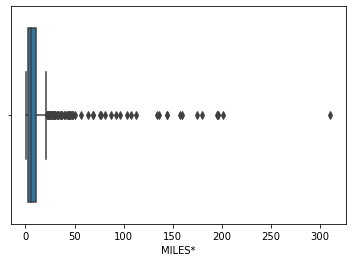

In [22]:
sns.boxplot(df["MILES*"])

## large number of outliers

### Treating Outliers

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MILES*'>

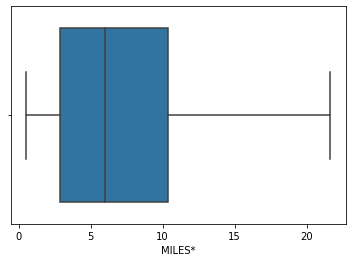

In [55]:
def outlier(df):
    for column in df.columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        df.loc[:, column] = np.where(df[column].values > upper, upper , df[column].values)
        df.loc[:, column] = np.where(df[column].values < lower , lower, df[column]. values)
sns.boxplot(df['MILES*'])
## It doesnot have outliers now

In [56]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'month', 'date', 'start time', 'end time', 'speed',
       'ride duration', 'day', 'na_flag', 'Purpose_treated', 'start date',
       'end date', 'start hour', 'end hour', 'start min', 'end min', 'hour',
       'actual time'],
      dtype='object')

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,date,start time,...,na_flag,Purpose_treated,start date,end date,start hour,end hour,start min,end min,hour,actual time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain,1,NaN,21:11:00,...,0,Meal/Entertain,2016-01-01,2016-01-01,21,21,11,17,0,6
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.00,NaN,1,NaN,01:25:00,...,1,Meeting,2016-01-02,2016-01-02,1,1,25,37,0,12
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies,1,NaN,20:25:00,...,0,Errand/Supplies,2016-01-02,2016-01-02,20,20,25,38,0,13
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.70,Meeting,1,NaN,17:31:00,...,0,Meeting,2016-01-05,2016-01-05,17,17,31,45,0,14
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,21.65,Customer Visit,1,NaN,14:42:00,...,0,Customer Visit,2016-01-06,2016-01-06,14,15,42,49,60,67


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MILES*'>

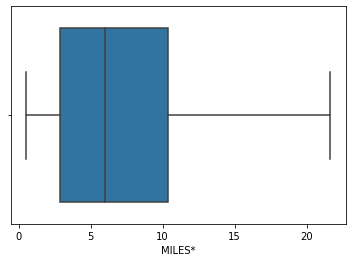

In [29]:
q1, q3 = np.percentile(df['MILES*'], [25,75])
iqr = q3-q1
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)

df["MILES*"] = df["MILES*"].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x < lower_fence else x)
df['MILES*'] = df['MILES*'].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x < lower_fence else x)
sns.boxplot(df['MILES*'])

### Checking Distribution plot for miles

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MILES*'>

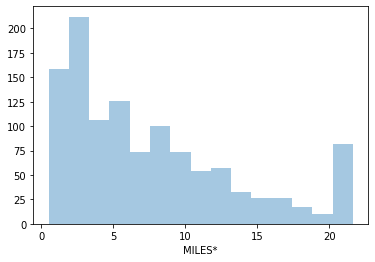

In [31]:
sns.distplot(df["MILES*"], kde = False)

### Treating Na's in purpose

In [32]:
df[df['PURPOSE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,date,start time,end time,speed,ride duration,day
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,02-09-2016 10:54,02-09-2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,02-09-2016 11:43,02-09-2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,02-09-2016 13:36,02-09-2016 13:52,Personal,Tanglewood,Preston,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,12/19/2016 14:18,12/19/2016 14:32,Business,Unknown Location,Unknown Location,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,12/19/2016 14:37,12/19/2016 14:50,Business,Unknown Location,Unknown Location,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,12/19/2016 19:05,12/19/2016 19:17,Business,Islamabad,Unknown Location,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,12/20/2016 8:49,12/20/2016 9:24,Business,Unknown Location,Rawalpindi,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df[df['CATEGORY*']== "Business"].head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,date,start time,end time,speed,ride duration,day
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies,morning,NaN,NaN,NaN,NaN,NaN,Monday
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.70,Meeting,day,NaN,NaN,NaN,NaN,NaN,NaN
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,21.65,Customer Visit,evening,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df[df['CATEGORY*']== "Personal"].head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,date,start time,end time,speed,ride duration,day
85,02-09-2016 10:54,02-09-2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,02-09-2016 11:43,02-09-2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,02-09-2016 13:36,02-09-2016 13:52,Personal,Tanglewood,Preston,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,02-09-2016 13:58,02-09-2016 14:02,Personal,Preston,Whitebridge,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,2/13/2016 23:45,2/14/2016 0:01,Personal,East Elmhurst,Jackson Heights,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df['na_flag'] = df['PURPOSE*'].isna().astype(int)

In [36]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,date,start time,end time,speed,ride duration,day,na_flag
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,1
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies,morning,NaN,NaN,NaN,NaN,NaN,Monday,0
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.70,Meeting,day,NaN,NaN,NaN,NaN,NaN,NaN,0
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,21.65,Customer Visit,evening,NaN,NaN,NaN,NaN,NaN,NaN,0


In [37]:
k = []
for ind,row in df.iterrows():
    if (row['CATEGORY*']=='Business')and(row['na_flag']==1) :
        k.append('Meeting')
    elif (row['CATEGORY*']=='Personal')and(row['na_flag']==1) :
        k.append('Moving')
    else:
        k.append(row['PURPOSE*'])

df['Purpose_treated'] = k
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,date,start time,end time,speed,ride duration,day,na_flag,Purpose_treated
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,1,Meeting
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies,morning,NaN,NaN,NaN,NaN,NaN,Monday,0,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.70,Meeting,day,NaN,NaN,NaN,NaN,NaN,NaN,0,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,21.65,Customer Visit,evening,NaN,NaN,NaN,NaN,NaN,NaN,0,Customer Visit


In [38]:
df.groupby("CATEGORY*")["PURPOSE*"].value_counts().to_frame()

## most people in business category have moved for a meeting
## miles might have a role to play here
## meeting should take place within min miles same can be true for meals/entertainment
## will have to check the miles categorywise

PURPOSE*
CATEGORY* PURPOSE*                 
Business  Meeting               186
          Meal/Entertain        160
          Errand/Supplies       128
          Customer Visit        101
          Temporary Site         50
          Between Offices        18
          Airport/Travel          3
Personal  Moving                  4
          Charity ($)             1
          Commute                 1

In [8]:
# Other way to treat missing 

# df3 = df[df['CATEGORY*']=='Business']
# df3['PURPOSE*']= df3['PURPOSE*'].fillna('Meeting')
# df3['PURPOSE*'].isna().sum()

<AxesSubplot:xlabel='PURPOSE*', ylabel='MILES*'>

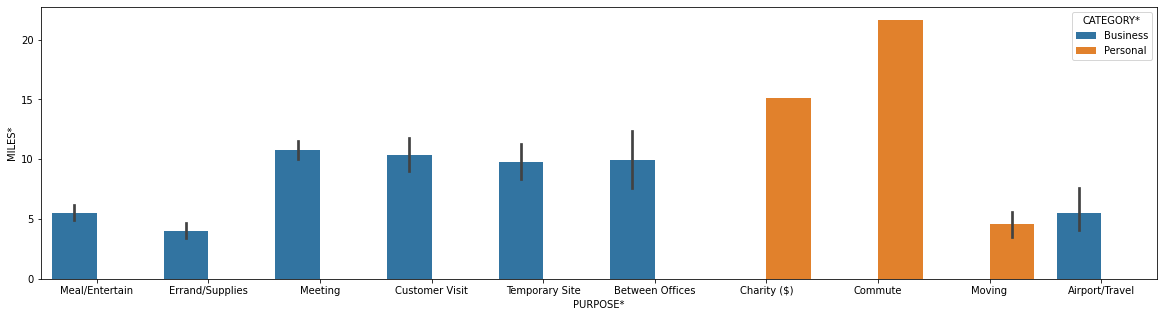

In [39]:
fig = plt.figure(figsize = (20,5),)
sns.barplot(x='PURPOSE*',y='MILES*',hue='CATEGORY*',data=df)


<AxesSubplot:>

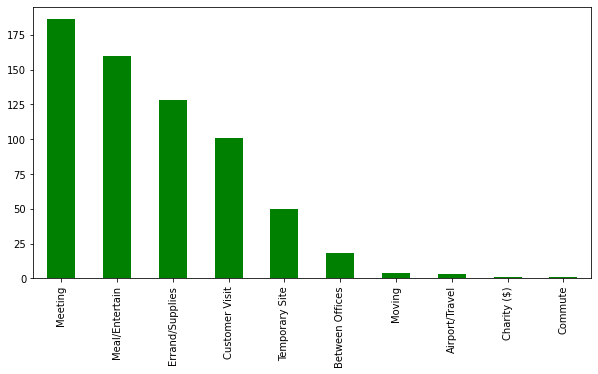

In [40]:
# see how many trips made by each purpose
purpose_time = df['PURPOSE*'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='green') 

In [41]:
df.groupby(['CATEGORY*', 'PURPOSE*'])['MILES*'].mean().to_frame()

## one way can be to fill in the purpose depending upon the average miles
## But there is not much difference between airport/ travel and meal/entertainment
## between offices and temporary sites
## between customer visit and meeting

MILES*
CATEGORY* PURPOSE*                  
Business  Airport/Travel    5.500000
          Between Offices   9.969444
          Customer Visit   10.358911
          Errand/Supplies   3.963672
          Meal/Entertain    5.527500
          Meeting          10.791398
          Temporary Site    9.800000
Personal  Charity ($)      15.100000
          Commute          21.650000
          Moving            4.550000

In [54]:
# new_df = df.drop(['PURPOSE*'],1)
# new_df.head()

### Pie chart for visualising distribution between classes

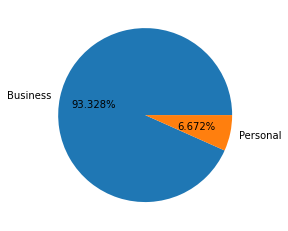

In [42]:
plt.pie(df['CATEGORY*'].value_counts(),
               labels = df['CATEGORY*'].unique(),
               autopct = '%0.3f%%');
plt.show()

## Class Imbalance

The format of start date and end date needs to be changed

In [43]:
from datetime import date,datetime

df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

df['start date']= df['START_DATE*'].dt.date
df['end date']= df['END_DATE*'].dt.date


In [17]:
df.dtypes

START_DATE*      datetime64[ns]
END_DATE*        datetime64[ns]
CATEGORY*                object
START*                   object
STOP*                    object
MILES*                  float64
PURPOSE*                 object
month                    object
date                    float64
start time              float64
end time                float64
speed                   float64
ride duration           float64
day                      object
start date               object
end date                 object
dtype: object

In [44]:
df['month'] = df['START_DATE*'].dt.month

df['start time'] = df['START_DATE*'].dt.time
df['end time'] = df['END_DATE*'].dt.time

df['start hour'] = df['START_DATE*'].dt.hour
df['end hour'] = df['END_DATE*'].dt.hour

df['start min'] = df['START_DATE*'].dt.minute
df['end min'] = df['END_DATE*'].dt.minute

In [45]:
df.head(50)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,date,start time,...,ride duration,day,na_flag,Purpose_treated,start date,end date,start hour,end hour,start min,end min
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain,1,NaN,21:11:00,...,NaN,NaN,0,Meal/Entertain,2016-01-01,2016-01-01,21,21,11,17
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.00,NaN,1,NaN,01:25:00,...,NaN,Thursday,1,Meeting,2016-01-02,2016-01-02,1,1,25,37
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies,1,NaN,20:25:00,...,NaN,Monday,0,Errand/Supplies,2016-01-02,2016-01-02,20,20,25,38
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.70,Meeting,1,NaN,17:31:00,...,NaN,NaN,0,Meeting,2016-01-05,2016-01-05,17,17,31,45
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,21.65,Customer Visit,1,NaN,14:42:00,...,NaN,NaN,0,Customer Visit,2016-01-06,2016-01-06,14,15,42,49
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.30,Meal/Entertain,1,NaN,17:15:00,...,NaN,NaN,0,Meal/Entertain,2016-01-06,2016-01-06,17,17,15,19
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.10,Meeting,1,NaN,17:30:00,...,NaN,NaN,0,Meeting,2016-01-06,2016-01-06,17,17,30,35
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.80,Meeting,1,NaN,13:27:00,...,NaN,NaN,0,Meeting,2016-01-07,2016-01-07,13,13,27,33
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.30,Meeting,1,NaN,08:05:00,...,NaN,NaN,0,Meeting,2016-01-10,2016-01-10,8,8,5,25
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.50,Customer Visit,1,NaN,12:17:00,...,NaN,NaN,0,Customer Visit,2016-01-10,2016-01-10,12,12,17,44


In [46]:
df['hour'] = (df['end hour'] - df['start hour'])*60

In [47]:
df['ride duration'] = df['end min']-df['start min']

In [48]:
df['speed'] = df['MILES*'] / df['ride duration']

In [49]:
df['actual time'] = df['hour']+df['ride duration']

In [50]:
df.iloc[14]

START_DATE*        2016-01-11 11:56:00
END_DATE*          2016-01-11 12:03:00
CATEGORY*                     Business
START*               Flatiron District
STOP*                          Midtown
MILES*                             1.6
PURPOSE*               Errand/Supplies
month                                1
date                               NaN
start time                    11:56:00
end time                      12:03:00
speed                       -0.0301887
ride duration                      -53
day                                NaN
na_flag                              0
Purpose_treated        Errand/Supplies
start date                  2016-01-11
end date                    2016-01-11
start hour                          11
end hour                            12
start min                           56
end min                              3
hour                                60
actual time                          7
Name: 14, dtype: object

In [51]:
df.head(14)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,date,start time,...,na_flag,Purpose_treated,start date,end date,start hour,end hour,start min,end min,hour,actual time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain,1,NaN,21:11:00,...,0,Meal/Entertain,2016-01-01,2016-01-01,21,21,11,17,0,6
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.00,NaN,1,NaN,01:25:00,...,1,Meeting,2016-01-02,2016-01-02,1,1,25,37,0,12
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies,1,NaN,20:25:00,...,0,Errand/Supplies,2016-01-02,2016-01-02,20,20,25,38,0,13
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.70,Meeting,1,NaN,17:31:00,...,0,Meeting,2016-01-05,2016-01-05,17,17,31,45,0,14
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,21.65,Customer Visit,1,NaN,14:42:00,...,0,Customer Visit,2016-01-06,2016-01-06,14,15,42,49,60,67
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.30,Meal/Entertain,1,NaN,17:15:00,...,0,Meal/Entertain,2016-01-06,2016-01-06,17,17,15,19,0,4
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.10,Meeting,1,NaN,17:30:00,...,0,Meeting,2016-01-06,2016-01-06,17,17,30,35,0,5
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.80,Meeting,1,NaN,13:27:00,...,0,Meeting,2016-01-07,2016-01-07,13,13,27,33,0,6
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.30,Meeting,1,NaN,08:05:00,...,0,Meeting,2016-01-10,2016-01-10,8,8,5,25,0,20
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.50,Customer Visit,1,NaN,12:17:00,...,0,Customer Visit,2016-01-10,2016-01-10,12,12,17,44,0,27


In [52]:
df['ride duration'].max()

56

## Extracting day, year and month

In [32]:
# df['day'] = df['START_DATE*'].dt.weekday
df['year'] = df['START_DATE*'].dt.year

df['day'] = df['START_DATE*'].dt.day_name()
df.iloc[14]

START_DATE*        2016-01-11 11:56:00
END_DATE*          2016-01-11 12:03:00
CATEGORY*                     Business
START*               Flatiron District
STOP*                          Midtown
MILES*                             1.6
PURPOSE*               Errand/Supplies
month                                1
date                               NaN
start time                    11:56:00
end time                      12:03:00
speed                       -0.0301887
ride duration                      -53
day                             Monday
na_flag                              0
Purpose_treated        Errand/Supplies
start date                  2016-01-11
end date                    2016-01-11
start hour                          11
start min                           56
end min                              3
duration_time                      NaN
end hour                            12
hour                                60
actual time                          7
year                     

In [33]:
df['day'].value_counts()  ## maximum on day Friday

Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: day, dtype: int64

In [249]:
# WHAT TIME OF DAY IT IS
# 4:00 to 8:59 -- early morning
# 9:00 to 15:59 -- midday
# 16:00 to 21:59 -- evening/night
# 22:00 to 3:59 -- late night
df['Pickup_time_of_day']=df['START_DATE*'].apply(lambda x: 'early_morning' if x.hour>4 and x.hour <=8 else 'midday' if x.hour>8 and x.hour <=16 else 'evening' if x.hour>16 and x.hour <=21 else 'late_night' )
df['Dropoff_time_of_day']=df['END_DATE*'].apply(lambda x: 'early_morning' if x.hour>4 and x.hour <=8 else 'midday' if x.hour>8 and x.hour <=16 else 'evening' if x.hour>16 and x.hour <=21 else 'late_night' )


<AxesSubplot:xlabel='day', ylabel='count'>

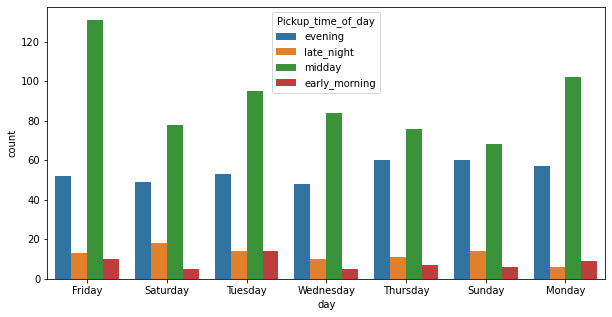

In [250]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='day',data=df,hue = 'Pickup_time_of_day' )
# 

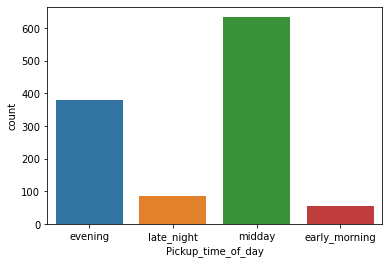

In [251]:
sns.countplot(x='Pickup_time_of_day',data=df)
plt.show()
# Day time is Busy time, followed by Evening

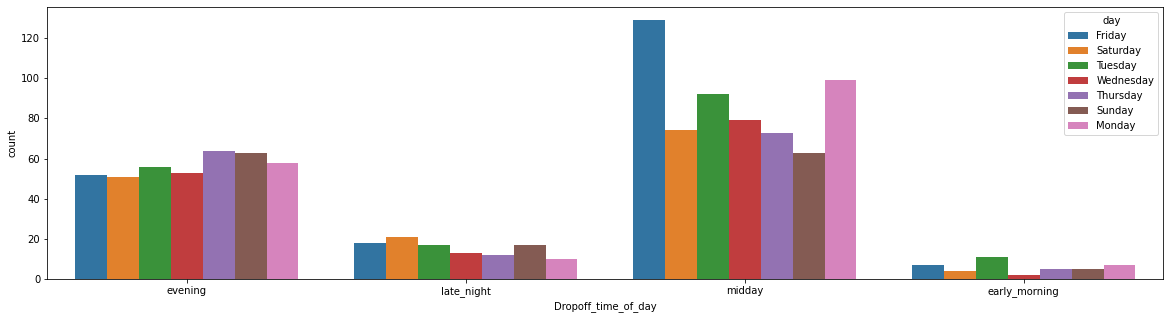

In [252]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x='Dropoff_time_of_day',data=df,hue = 'day')
plt.show()
 # most busy in Day time, on Friday followed by Monday

<AxesSubplot:xlabel='duration_time', ylabel='count'>

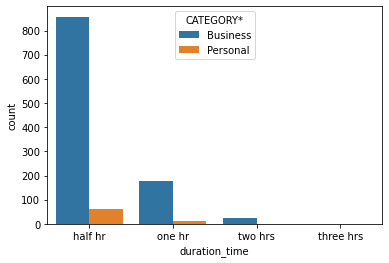

In [36]:
bins=np.array([0,30,90,210,390])
df['duration_time']=pd.cut(df['actual time'],bins,labels=["half hr", "one hr", "two hrs", "three hrs"])

sns.countplot(x=df['duration_time'], hue = 'CATEGORY*', data = df)

In [37]:
df.groupby("day")["MILES*"].sum().to_frame()

,MILES*
day,
Friday,2595.0
Monday,1387.4
Saturday,1976.3
Sunday,1696.4
Thursday,1818.0
Tuesday,1481.7
Wednesday,1249.9


C:\Users\Dralls\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='count'>

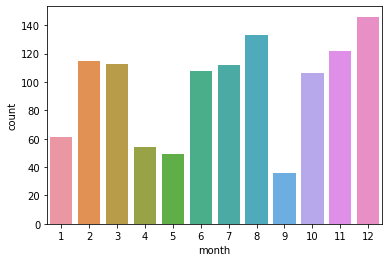

In [244]:
sns.countplot(df['month'])  ## december has most bookings